In [13]:
##Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge

def getMax(arr):
    maxVal = -1
    index = -1
    for i in range(len(arr)):
        if(maxVal < arr[i]):
            maxVal = arr[i]
            index = i
    return {'index': index,
           'maximum_value': maxVal}

def getF1(trainSize, testMean):
    max_test = getMax(testMean)
    index = max_test['index']
    maxValue = max_test['maximum_value']
    optimalTrainSize = trainSize[index]
    conclusion = f'With the train size of {optimalTrainSize} yields the f1 score of {maxValue}.'
    return conclusion

def prediction(df, xTrain, yTrain, xTest, yTest):
    output = {}
    start = time.time()
    df.fit(xTrain, yTrain)
    test_pred = df.predict(xTest)
    cRep = classification_report(yTest, test_pred, digits=4)
    f1Score = f1_score(yTest, test_pred)
    end = time.time()
    wallClockPred = end - start
    outputUpdate = (('classification_report', cRep), ('f1_score', f1Score), ('wall_clock', wallClockPred))
    output.update(outputUpdate)
    return output

def printPredictions(pred):
    print('Time spent for prediction: ', pred['wall_clock'])
    print(pred['classification_report'])
    print('f1-Score: ', pred['f1_score'])

##load the file and update the column names
##https://archive.ics.uci.edu/ml/datasets/Heart+Disease data source
df = pd.read_csv('/Users/jacobseo/cs7641/assignment1/data/processed.cleveland.data', header=None)

df.columns = ['age','sex','chestPain','restingBloodPressure','cholesterol','fastingBloodSugar','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

messy_df = df.loc[(df['ca'] == '?') | (df['thal'] == '?')]
clean_df = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]
##data Split to independent variable
X = clean_df.drop('num', axis=1).copy()

y = clean_df['num'].copy()

## category attriutes into binary format
pd.get_dummies(X, columns=['chestPain']).head()

X_encoded = pd.get_dummies(X, columns=['chestPain', 'restecg','slope','thal'])
#X_encoded.head()

y_nonZeroIndex = y > 0
y[y_nonZeroIndex] = 1
#y.unique()

X.head()

,age,sex,chestPain,restingBloodPressure,cholesterol,fastingBloodSugar,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


[learning_curve] Training set sizes: [  2   8  13  18  24  29  35  40  45  51  56  62  67  72  78  83  88  94
  99 105 110 115 121 126 132 137 142 148 153 159 164 169 175 180 186 191
 196 202 207 213 218 223 229 234 240 245 250 256 261 267]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 500 | elapsed:    2.9s remaining:   31.2s
[Parallel(n_jobs=-1)]: Done  93 out of 500 | elapsed:    3.1s remaining:   13.7s
[Parallel(n_jobs=-1)]: Done 144 out of 500 | elapsed:    3.4s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done 195 out of 500 | elapsed:    3.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 246 out of 500 | elapsed:    3.9s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 297 out of 500 | elapsed:    4.2s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 348 out of 500 | elapsed:    4.5s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 399 out of 500 | elapsed:    4.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 450 out of 500 | elapsed:    5.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.2s finished


'With the train size of 267 yields the f1 score of 0.6203594234628718.'

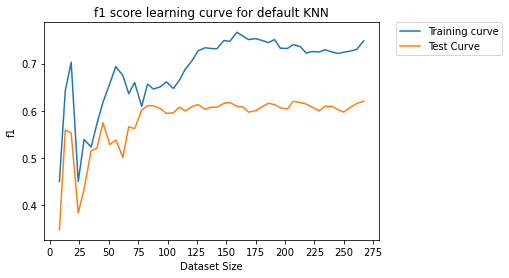

In [14]:
##Default learning Curve
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(), X, y, cv=10, scoring='f1', n_jobs=-1, train_sizes=np.linspace(0.01,1.0,50), verbose=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training curve')
plt.plot(train_sizes, test_mean, label='Test Curve')
plt.xticks(list(range(0, 300, 25)))
plt.xlabel("Dataset Size")
plt.ylabel("f1")
plt.title("f1 score learning curve for default KNN")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

getF1(train_sizes, test_mean)

In [15]:
##Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

##GridSearch
params = {
    'n_neighbors': [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144],
    'weights': ['distance', 'uniform']
}

gs = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=10, n_jobs=-1, verbose=10, return_train_score=True, scoring='f1')
gs.fit(X_train, y_train)

##Best Results
best_parameter = gs.best_params_
best_score = gs.best_score_

print("best parameter: ", best_parameter)
print("best score: ", best_score)

Fitting 10 folds for each of 22 candidates, totalling 220 fits
best parameter:  {'n_neighbors': 5, 'weights': 'uniform'}
best score:  0.6348435026184387


In [16]:
results_data = pd.DataFrame(gs.cv_results_)
##best parameter:  {'n_neighbors': 8, 'weights': 'uniform'}
optimal_results_data = results_data.loc[results_data['param_weights']=='uniform']
optimal_results_data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
1,0.006663,0.001033,0.009453,0.002332,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.526316,0.333333,0.761905,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.006644,0.000905,0.012304,0.005539,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.533333,0.250000,0.705882,...,0.661871,0.680851,0.712329,0.685315,0.666667,0.703448,0.694444,0.676056,0.694028,0.026757
5,0.007504,0.002709,0.010692,0.004656,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.695652,0.500000,0.842105,...,0.776596,0.797814,0.824176,0.793651,0.787234,0.791444,0.806122,0.781250,0.797531,0.016709
7,0.006187,0.001571,0.009255,0.003684,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.761905,0.500000,0.761905,...,0.722222,0.758242,0.771739,0.745946,0.760870,0.732240,0.750000,0.732984,0.749598,0.017976
9,0.005197,0.001054,0.006430,0.000464,8,uniform,"{'n_neighbors': 8, 'weights': 'uniform'}",0.666667,0.444444,0.736842,...,0.621118,0.686391,0.686747,0.674699,0.594937,0.674699,0.689266,0.682081,0.667450,0.032380
11,0.005050,0.000961,0.006145,0.000370,13,uniform,"{'n_neighbors': 13, 'weights': 'uniform'}",0.666667,0.400000,0.800000,...,0.666667,0.677419,0.677966,0.674033,0.663102,0.685083,0.729167,0.716578,0.690099,0.021869
13,0.004698,0.000421,0.006123,0.000322,21,uniform,"{'n_neighbors': 21, 'weights': 'uniform'}",0.526316,0.400000,0.800000,...,0.647727,0.692308,0.662921,0.677596,0.655556,0.699454,0.701031,0.688525,0.685088,0.026282
15,0.004624,0.000308,0.006430,0.000766,34,uniform,"{'n_neighbors': 34, 'weights': 'uniform'}",0.526316,0.444444,0.800000,...,0.581818,0.606061,0.613497,0.590361,0.581818,0.627907,0.651934,0.634731,0.612345,0.021815
17,0.004636,0.000462,0.006646,0.000964,55,uniform,"{'n_neighbors': 55, 'weights': 'uniform'}",0.526316,0.444444,0.800000,...,0.493506,0.503226,0.550336,0.550000,0.555556,0.516129,0.593023,0.547771,0.542066,0.028010
19,0.004667,0.000562,0.006619,0.000417,89,uniform,"{'n_neighbors': 89, 'weights': 'uniform'}",0.526316,0.421053,0.800000,...,0.493151,0.517007,0.541667,0.532468,0.538462,0.510067,0.521739,0.543046,0.526303,0.015571


(0.3, 1.0)

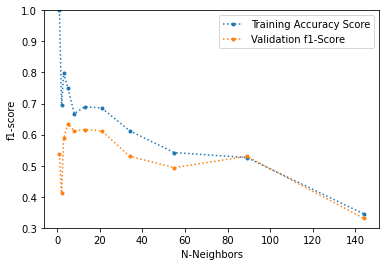

In [17]:
##GridSearch Plotting
fig, ax = plt.subplots()
optimal_results_data.plot(x='param_n_neighbors', y='mean_train_score', label='Training Accuracy Score', ax=ax, marker='.', ls=':')
optimal_results_data.plot(x='param_n_neighbors', y='mean_test_score', label='Validation f1-Score', ax=ax, marker='.', ls=':')

ax.set_xlabel('N-Neighbors')
ax.set_ylabel('f1-score')
ax.set_ylim(bottom=0.3, top=1.0)

In [18]:
##learning Curve
#best parameter:  {'n_neighbors': 8, 'weights': 'uniform'}
optimal_df = KNeighborsClassifier(n_neighbors=8, weights='uniform')
train_sizes, train_scores, test_scores = learning_curve(optimal_df, X, y, cv=10, scoring='f1', n_jobs=-1, train_sizes=np.linspace(0.01,1.0,50), verbose=10)



[learning_curve] Training set sizes: [  2   8  13  18  24  29  35  40  45  51  56  62  67  72  78  83  88  94
  99 105 110 115 121 126 132 137 142 148 153 159 164 169 175 180 186 191
 196 202 207 213 218 223 229 234 240 245 250 256 261 267]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 500 | elapsed:    0.3s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  93 out of 500 | elapsed:    0.5s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 144 out of 500 | elapsed:    0.7s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 195 out of 500 | elapsed:    0.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 246 out of 500 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 297 out of 500 | elapsed:    1.3s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 348 out of 500 | elapsed:    1.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 399 out of 500 | elapsed:    1.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 450 out of 500 | elapsed:    2.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.7s finished


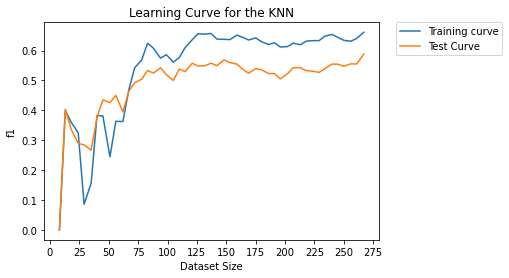

In [19]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training curve')
plt.plot(train_sizes, test_mean, label='Test Curve')
plt.xticks(list(range(0, 300, 25)))
plt.xlabel("Dataset Size")
plt.ylabel("f1")
plt.title("Learning Curve for the KNN")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)



In [20]:
##Predictions
pred = prediction(optimal_df, X_train, y_train, X_test, y_test)
printPredictions(pred)

Time spent for prediction:  0.02212214469909668
              precision    recall  f1-score   support

           0     0.6800    0.8095    0.7391        42
           1     0.6800    0.5152    0.5862        33

    accuracy                         0.6800        75
   macro avg     0.6800    0.6623    0.6627        75
weighted avg     0.6800    0.6800    0.6718        75

f1-Score:  0.5862068965517241
